In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 80668, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 80668 (delta 118), reused 169 (delta 99), pack-reused 80473
Receiving objects: 100% (80668/80668), 594.59 MiB | 24.14 MiB/s, done.
Resolving deltas: 100% (57479/57479), done.


In [ ]:
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!cd models/research && \
     cp object_detection/packages/tf2/setup.py . \
     && python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
import os
import pathlib
import tensorflow as tf

In [ ]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/walkingdog.jpeg

--2023-01-21 18:39:58--  https://lazyprogrammer.me/course_files/object_detection_images/walkingdog.jpeg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195368 (191K) [image/jpeg]
Saving to: ‘walkingdog.jpeg’

walkingdog.jpeg     100%[===================>] 190.79K  --.-KB/s    in 0.1s    

2023-01-21 18:39:58 (1.75 MB/s) - ‘walkingdog.jpeg’ saved [195368/195368]



In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/traffic.jpeg
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/jungle.jpeg
!wget -nc https://lazyprogrammer.me/course_files/object_detection_images/intersection.jpeg

--2023-01-21 18:40:30--  https://lazyprogrammer.me/course_files/object_detection_images/traffic.jpeg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160514 (157K) [image/jpeg]
Saving to: ‘traffic.jpeg’

traffic.jpeg        100%[===================>] 156.75K  --.-KB/s    in 0.1s    

2023-01-21 18:40:31 (1.09 MB/s) - ‘traffic.jpeg’ saved [160514/160514]

--2023-01-21 18:40:31--  https://lazyprogrammer.me/course_files/object_detection_images/jungle.jpeg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104236 (102K) [image/jpeg]
Saving to: ‘jungle.jpeg’

jungle.jpeg         100%[======

In [ ]:
!ls

intersection.jpeg  models	traffic.jpeg
jungle.jpeg	   sample_data	walkingdog.jpeg


In [ ]:
IMAGE_PATHS=['intersection.jpeg','walkingdog.jpeg','traffic.jpeg','jungle.jpeg']

In [ ]:
URL_PATH='http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz'

In [ ]:
PATH_TO_MODEL_DIR=tf.keras.utils.get_file(fname='ssd_resnet101_v1_fpn_640x640_coco17_tpu-8',
                                          origin=URL_PATH,
                                          untar=True)

386527459/386527459 [==============================] - 3s 0us/step


In [ ]:
PATH_TO_MODEL_DIR

'/root/.keras/datasets/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8'

In [69]:
LABEL_URL='https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt'

In [70]:
PATH_TO_LABELS=tf.keras.utils.get_file(fname='mscoco_label_map.pbtxt',
                                          origin=LABEL_URL,
                                          untar=False,extract=True)

In [71]:
PATH_TO_LABELS

'/root/.keras/datasets/mscoco_label_map.pbtxt'

In [73]:
!head mscoco_label_map.pbtxt.txt

item {
  name: "/m/01g317"
  id: 1
  display_name: "person"
}
item {
  name: "/m/0199g"
  id: 2
  display_name: "bicycle"
}


In [118]:
PATH_TO_SAVED_MODEL=PATH_TO_MODEL_DIR+"/saved_model"

In [119]:
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

In [120]:
 category_index=label_map_util.create_category_index_from_labelmap('mscoco_label_map.pbtxt.txt', use_display_name=True)

In [121]:
category_index

{1: {'id': 1, 'name': 'person'},
 2: {'id': 2, 'name': 'bicycle'},
 3: {'id': 3, 'name': 'car'},
 4: {'id': 4, 'name': 'motorcycle'},
 5: {'id': 5, 'name': 'airplane'},
 6: {'id': 6, 'name': 'bus'},
 7: {'id': 7, 'name': 'train'},
 8: {'id': 8, 'name': 'truck'},
 9: {'id': 9, 'name': 'boat'},
 10: {'id': 10, 'name': 'traffic light'},
 11: {'id': 11, 'name': 'fire hydrant'},
 13: {'id': 13, 'name': 'stop sign'},
 14: {'id': 14, 'name': 'parking meter'},
 15: {'id': 15, 'name': 'bench'},
 16: {'id': 16, 'name': 'bird'},
 17: {'id': 17, 'name': 'cat'},
 18: {'id': 18, 'name': 'dog'},
 19: {'id': 19, 'name': 'horse'},
 20: {'id': 20, 'name': 'sheep'},
 21: {'id': 21, 'name': 'cow'},
 22: {'id': 22, 'name': 'elephant'},
 23: {'id': 23, 'name': 'bear'},
 24: {'id': 24, 'name': 'zebra'},
 25: {'id': 25, 'name': 'giraffe'},
 27: {'id': 27, 'name': 'backpack'},
 28: {'id': 28, 'name': 'umbrella'},
 31: {'id': 31, 'name': 'handbag'},
 32: {'id': 32, 'name': 'tie'},
 33: {'id': 33, 'name': 'suitc

In [122]:
def load_image_to_numpy_array(path):
  return np.array(Image.open(path))

In [140]:
def detect_objects(image_path):
  image_np=load_image_to_numpy_array(image_path)
  input_tensor=tf.convert_to_tensor(image_np)
  input_tensor=input_tensor[tf.newaxis, ...]
  detections=detect_fn(input_tensor)
  num_detections=int(detections.pop('num_detections'))
  print(detections)
  detections={key: value[0,:num_detections].numpy()
                for key,value in detections.items()}
  detections['num_detections']=num_detections
  detections['detection_classes']=detections['detection_classes'].astype(np.int64)
  image_np_with_detections=image_np.copy()

  viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes'],
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.5,
            agnostic_mode=False)


  plt.figure(figsize=(15,10))
  plt.imshow(image_np_with_detections)
  print('Done')
  plt.show()


{'raw_detection_boxes': <tf.Tensor: shape=(1, 51150, 4), dtype=float32, numpy=
array([[[-1.41803734e-03,  1.48720760e-03,  2.08952129e-02,
          1.90126747e-02],
        [-2.06225421e-02, -1.41679365e-02,  4.55802009e-02,
          3.67270336e-02],
        [-2.45456817e-03,  6.53317198e-04,  1.37197822e-02,
          3.38254496e-02],
        ...,
        [ 4.45232540e-01,  9.65723395e-02,  1.27244556e+00,
          1.52310109e+00],
        [ 3.15756261e-01,  6.84201598e-01,  1.35516453e+00,
          1.11169541e+00],
        [-5.01722693e-02,  4.92237985e-01,  1.57441401e+00,
          1.26286840e+00]]], dtype=float32)>, 'detection_scores': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.729508  , 0.62539107, 0.51820046, 0.14657918, 0.11189414,
        0.10363968, 0.09855194, 0.08653468, 0.08631533, 0.08146918,
        0.08039825, 0.08016134, 0.08015171, 0.08012262, 0.07405409,
        0.0740459 , 0.07304629, 0.07047541, 0.06962466, 0.06936813,
        0.06906613, 0.068

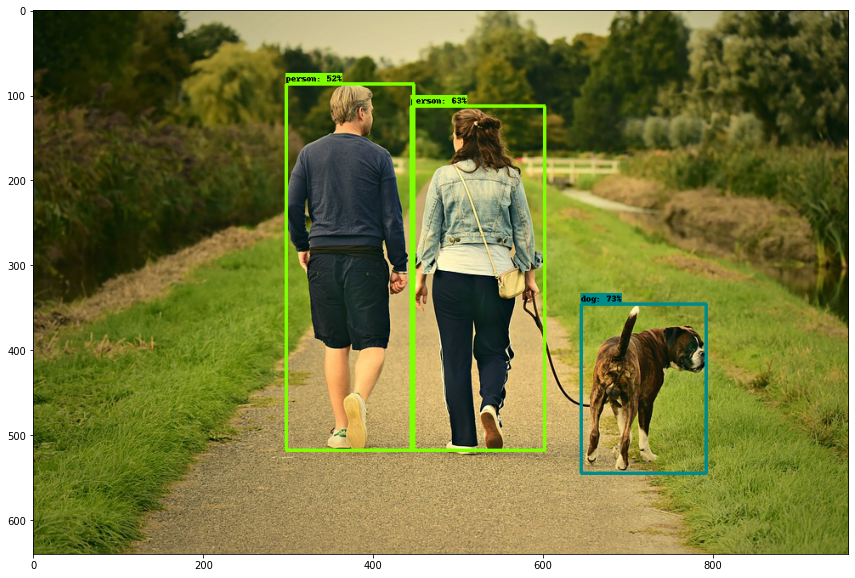

In [141]:
detect_objects(IMAGE_PATHS[1])

{'raw_detection_boxes': <tf.Tensor: shape=(1, 51150, 4), dtype=float32, numpy=
array([[[-9.7557623e-04,  3.1977613e-03,  2.0540588e-02,  2.3730556e-02],
        [-2.1943321e-02, -2.0293958e-02,  4.1166991e-02,  4.1147459e-02],
        [-1.4475910e-03,  2.2624554e-03,  1.5604102e-02,  3.2865983e-02],
        ...,
        [ 4.6279612e-01,  5.2750051e-02,  1.2327049e+00,  1.5177748e+00],
        [ 3.4313503e-01,  6.8576050e-01,  1.3206891e+00,  1.1116983e+00],
        [-5.4869235e-02,  4.9638391e-01,  1.5484178e+00,  1.2755708e+00]]],
      dtype=float32)>, 'detection_scores': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.89623076, 0.84100187, 0.8002626 , 0.7764138 , 0.74449384,
        0.6988139 , 0.46275908, 0.4043229 , 0.39978465, 0.34905106,
        0.28747982, 0.28410032, 0.26234517, 0.23396598, 0.2212614 ,
        0.20522073, 0.20485038, 0.18456261, 0.18291643, 0.16348216,
        0.16130932, 0.16109294, 0.16098362, 0.16095155, 0.16031414,
        0.14882806, 0.1477906

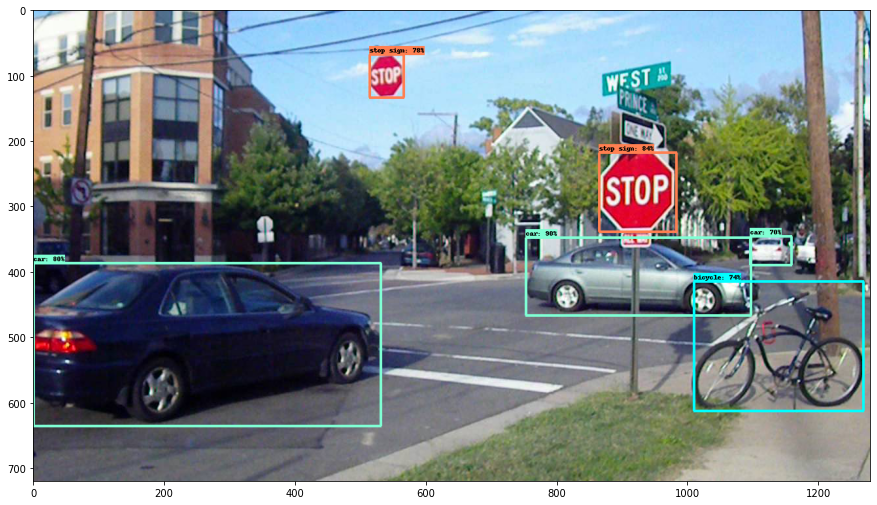

In [147]:
detect_objects(IMAGE_PATHS[0])